# TP9 - Natural Language Processing - Examples

### Import libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Utility
import numpy as np
import os
from collections import Counter
import time
import pickle
import itertools

### NLP libraries

In [2]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk.corpus
import numpy as np
np.random.seed(2018)

In [3]:
# download guide : https://www.nltk.org/data.html

import nltk
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package words to /home/simon/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/simon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/simon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/simon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/simon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/simon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/simon/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

## Tokenisation 

In [4]:
text = "In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern side of South America" 
# importing word_tokenize from nltk
from nltk.tokenize import word_tokenize
# Passing the string text into word tokenize for breaking the sentences
token = word_tokenize(text)
token


['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

## Find the frequency of each word

In [5]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist


FreqDist({'the': 3, 'Brazil': 2, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [6]:
# To find the frequency of top 10 words
fdist1 = fdist.most_common(10)
fdist1


[('the', 3),
 ('Brazil', 2),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

## Stemmer example

In [7]:
# Importing Porterstemmer from nltk library
# Checking for the word ‘giving’ 
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem("giving")


'give'

In [8]:
# Checking for the list of words
stm = ["giving", "gives", "given", "gave"]
for word in stm :
   print(word+ ":" +pst.stem(word))


giving:give
gives:give
given:given
gave:gave


In [9]:
# Importing LancasterStemmer from nltk
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ["giving", "gives", "given", "gave"]
for word in stm :
 print(word+ ":" +lst.stem(word))


giving:giv
gives:giv
given:giv
gave:gav


## Lemmatization example

In [10]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [11]:
print(WordNetLemmatizer().lemmatize('gave', pos='v'))

give


In [12]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
 
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


## Stop words

In [13]:
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."
text1 = word_tokenize(text.lower())
print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)


['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


## Part of Speech tagging (POS)

In [14]:
text = "vote to choose a particular man or a group (party) to represent them in parliament"
#Tokenize the text
tex = word_tokenize(text)
for token in tex:
    print(nltk.pos_tag([token]))


[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('man', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('parliament', 'NN')]


## Named entity recognition 

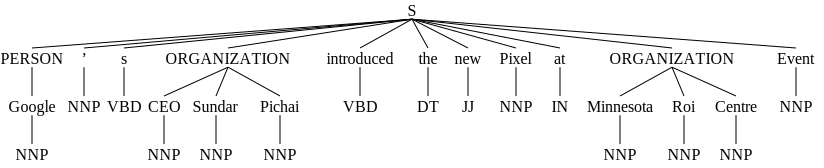

In [15]:
text = "Google’s CEO Sundar Pichai introduced the new Pixel at Minnesota Roi Centre Event"
#importing chunk library from nltk
from nltk import ne_chunk
# tokenize and POS Tagging before doing chunk
token = word_tokenize(text)
tags = nltk.pos_tag(token)
chunk = ne_chunk(tags)
chunk


## Fragmentation

In [16]:
text = "We saw the yellow dog"
token = word_tokenize(text)
tags = nltk.pos_tag(token)
reg = "NP: {<DT>?<JJ>*<NN>}" 
a = nltk.RegexpParser(reg)
result = a.parse(tags)
print(result)


(S We/PRP saw/VBD (NP the/DT yellow/JJ dog/NN))


## Lowercasing

In [17]:
texts=["FRANCE","France","FrancE","France"]
lower_words=[word.lower() for word in texts]
lower_words

['france', 'france', 'france', 'france']